In [ ]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

In [2]:
import visuals as vs
%matplotlib inline

In [3]:
# load the census dataset
data = pd.read_csv("census.csv")
display(data.head(n=4))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K


In [6]:
data.shape

(45222, 14)

# Data exploration

In [11]:

# total number of records
n_records = len(data)
n_greater_50k = len(data[data["income"]=='>50K'])
n_at_most_50k = len(data[data["income"]=='<=50K'])
greater_percent = n_greater_50k/n_records

print(f"Total number of records: {n_records}")
print(f"Individuals >50k income: {n_greater_50k}")
print(f"Individuals <=50k income: {n_at_most_50k}")
print(f"Percentage making >50K {greater_percent*100:.2f}%")

Total number of records: 45222
Individuals >50k income: 11208
Individuals <=50k income: 34014
Percentage making >50K 24.78%


In [12]:
# print the columns
print(data.columns)

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [24]:
# check out what's in each column
import numpy as np
for col in data.columns:
	print(f"Column: {col}")
	print(f"Possible values: {str(data[col].unique())[:2000]}...")
	
	print()
	
	

Column: age
Possible values: [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]...

Column: workclass
Possible values: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']...

Column: education_level
Possible values: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']...

Column: education-num
Possible values: [13.  9.  7. 14.  5. 10. 12.  4. 16. 11. 15.  3.  6.  1.  8.  2.]...

Column: marital-status
Possible values: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']...

Column: occupation
Possible values: [' Adm-clerical' ' Exec-managerial' ' Handlers-cle

# Preprocessing the data

F:\Programming\UdacityAI\charityML_project\cd0025-supervised-learning\starter\visuals.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


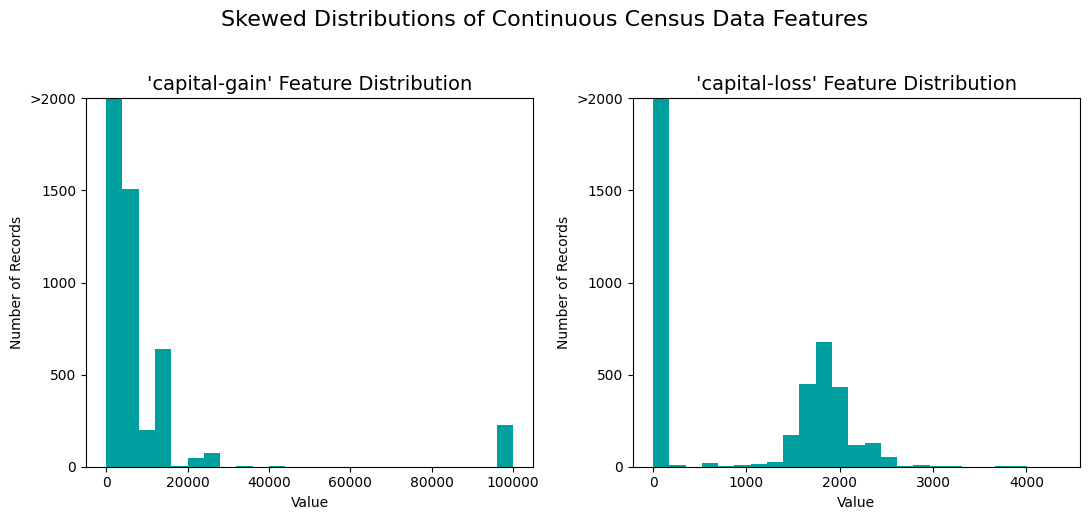

In [26]:
# Plot the histogram of 'capital-gain' and 'capital-loss'
income_raw = data['income']
features_raw = data.drop(columns=['income'])

# visualize
vs.distribution(data)

In [37]:
# apply a logarithmic transformation so that very large/very small values do not negatively affect the performance of our learner
# log of 0 is undefined, so we must translate the values by a small amount above 0
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data=features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x+1))
display(features_raw[skewed])
display(features_log_transformed[skewed])


,capital-gain,capital-loss
0,2174.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
45217,0.0,0.0
45218,0.0,0.0
45219,0.0,0.0
45220,5455.0,0.0


,capital-gain,capital-loss
0,7.684784,0.0
1,0.000000,0.0
2,0.000000,0.0
3,0.000000,0.0
4,0.000000,0.0
...,...,...
45217,0.000000,0.0
45218,0.000000,0.0
45219,0.000000,0.0
45220,8.604471,0.0


F:\Programming\UdacityAI\charityML_project\cd0025-supervised-learning\starter\visuals.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


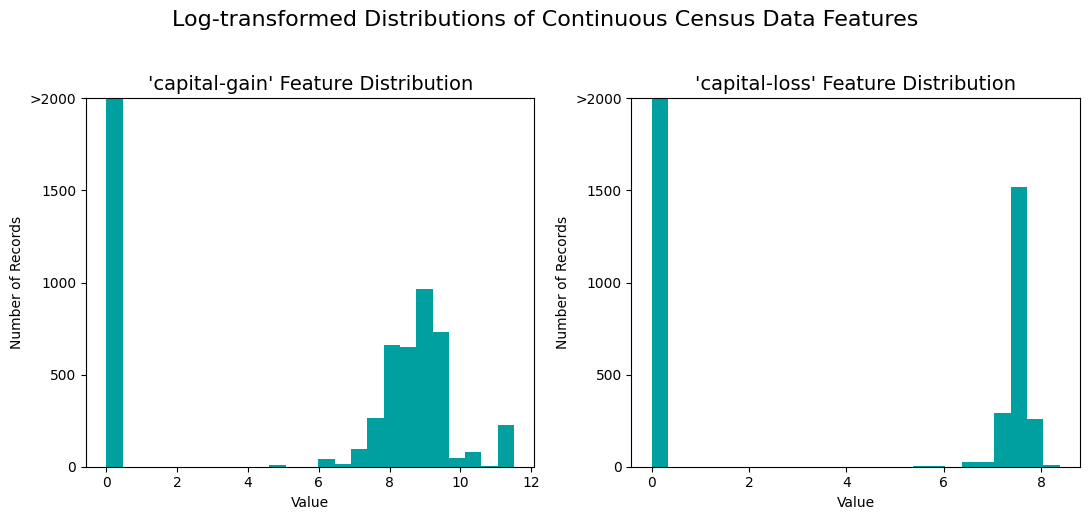

In [38]:
# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed=True)

In [39]:
# Normalizing numerical features
from sklearn.preprocessing import MinMaxScaler

# initialize a scaler, then apply it to the features
scaler = MinMaxScaler()  # default = (0,1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_log_minmax_transform = pd.DataFrame(data=features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# show an example of a record with scaling applied
display(features_log_minmax_transform.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [43]:
# Data preprocessing - converting categorical variables to one-hot encoding
features_final = pd.get_dummies(features_log_minmax_transform)


In [49]:
# convert the target label 'income_raw' into numerical entries
# setting "<=50K" to 0 and ">50K" to 1
income = income_raw.map({"<=50K": 0, ">50K": 1})

In [50]:
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print(f"{len(encoded)} total features after one-hot encoding")

103 total features after one-hot encoding


In [52]:
# Now all categorical variables have been converted into numerical features, and all numerical variables have been normalized
# now split the data (both features and their labels) into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size=0.2, random_state=0)

print(f"Training set has {X_train.shape[0]} samples")
print(f"Testing set has {X_test.shape[0]} samples")

Training set has 36177 samples
Testing set has 9045 samples


# Evaluating Model Performance

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

# here we choose beta=0.5 for the fbeta score
# because we're going to prioritize "precision" rather than "recall"
# we consider the chance that the people we predict to be over 50K income tends to be actually over 50K income to be more important
# we don't care if we can classify all >50K earners as so (it's ok to miss some of them - so recall is not as prioritized)

def print_accuracy(actuals, preds, model_name=None):
	if model_name:
		print(f"Model: {model_name}")
	print(f"Accuracy: {accuracy_score(actuals, preds):.2f}")
	print(f"Precision: {precision_score(actuals, preds):.2f}")
	print(f"Recall: {recall_score(actuals, preds):.2f}")
	print(f"F-0.5 score: {fbeta_score(actuals, preds, beta=0.5)}")

In [63]:
# naive predictor
# predicting everyone as >50K
preds = [1 for i in range(X_test.shape[0])]
print_accuracy(y_test, preds, "Naive model")


Model: Naive model
Accuracy: 0.24
Precision: 0.24
Recall: 1.00
F-0.5 score: 0.28722157092614303


In [64]:
# another naive predictor: consider everyone <= 50K
preds = [0 for i in range(X_test.shape[0])]
print_accuracy(y_test, preds, "2nd Naive Model")

Model: 2nd Naive Model
Accuracy: 0.76
Precision: 0.00
Recall: 0.00
F-0.5 score: 0.0


C:\Users\Thuan Nguyen\.conda\envs\UdacityAI\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
	"""
	
	:param learner: the learning algorithm to use 
	:param sample_size: the size of samples to be drawn from training set 
	:param X_train: features training set
	:param y_train: income training set
	:param X_test: features testing set
	:param y_test: income testing set
	"""
	results = {}
	
	start = time()
	learner.fit(X_train[:sample_size], y_train[:sample_size])
	end = time()
	
	# record the training time
	results['train_time'] = end-start
	
	# get predictions on the first 300 training samples of X_train
	start = time()
	if learner.__class__.__name__ == 'KNeighborsClassifier':
		X_test = X_test.values
		X_train = X_train.values
	predictions_test = learner.predict(X_test)
	predictions_train = learner.predict(X_train[:300])
	end = time()
	
	# record prediction time
	results['pred_time'] = end-start
	
	# measures
	results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
	results['acc_test'] = accuracy_score(y_test, predictions_test)
	results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
	results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
	
	print(f"{learner.__class__.__name__} trained on {sample_size} samples")
	return results

# Initial Evaluations of Some Models

In [103]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

clf_gaussianNB = GaussianNB()
clf_multinomialNB = MultinomialNB()
clf_decisionTree = DecisionTreeClassifier(random_state=0)
clf_bagging = BaggingClassifier(random_state=0)
clf_adaboost = AdaBoostClassifier(random_state=0)
clf_random_forest = RandomForestClassifier(random_state=0)
clf_gradient_boosting = GradientBoostingClassifier(random_state=0)
clf_knn = KNeighborsClassifier()
clf_sgd = SGDClassifier(random_state=0)
clf_svm = SVC(random_state=0)
clf_logistic = LogisticRegression(random_state=0)

# 100%, 10% and 1% of the training data
samples_100 = len(y_train)
samples_10 = int(len(y_train) * 0.1)
samples_1 = int(len(y_train) * 0.01)

# run the learners
results = {}

for clf in [clf_gaussianNB, clf_multinomialNB, clf_decisionTree, clf_bagging, clf_adaboost, clf_random_forest, clf_gradient_boosting, clf_knn, clf_sgd, clf_svm, clf_logistic]:
	clf_name = clf.__class__.__name__
	results[clf_name] = {}
	for i, samples in enumerate([samples_1, samples_10, samples_100]):
		results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

GaussianNB trained on 361 samples
GaussianNB trained on 3617 samples
GaussianNB trained on 36177 samples
MultinomialNB trained on 361 samples
MultinomialNB trained on 3617 samples
MultinomialNB trained on 36177 samples
DecisionTreeClassifier trained on 361 samples
DecisionTreeClassifier trained on 3617 samples
DecisionTreeClassifier trained on 36177 samples
BaggingClassifier trained on 361 samples
BaggingClassifier trained on 3617 samples
BaggingClassifier trained on 36177 samples
AdaBoostClassifier trained on 361 samples
AdaBoostClassifier trained on 3617 samples
AdaBoostClassifier trained on 36177 samples
RandomForestClassifier trained on 361 samples
RandomForestClassifier trained on 3617 samples
RandomForestClassifier trained on 36177 samples
GradientBoostingClassifier trained on 361 samples
GradientBoostingClassifier trained on 3617 samples
GradientBoostingClassifier trained on 36177 samples


C:\Users\Thuan Nguyen\.conda\envs\UdacityAI\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Thuan Nguyen\.conda\envs\UdacityAI\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNeighborsClassifier trained on 361 samples


C:\Users\Thuan Nguyen\.conda\envs\UdacityAI\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Thuan Nguyen\.conda\envs\UdacityAI\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNeighborsClassifier trained on 3617 samples


C:\Users\Thuan Nguyen\.conda\envs\UdacityAI\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Thuan Nguyen\.conda\envs\UdacityAI\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNeighborsClassifier trained on 36177 samples
SGDClassifier trained on 361 samples
SGDClassifier trained on 3617 samples
SGDClassifier trained on 36177 samples
SVC trained on 361 samples
SVC trained on 3617 samples
SVC trained on 36177 samples
LogisticRegression trained on 361 samples
LogisticRegression trained on 3617 samples
LogisticRegression trained on 36177 samples


C:\Users\Thuan Nguyen\.conda\envs\UdacityAI\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
results.keys()

dict_keys(['GaussianNB', 'MultinomialNB', 'DecisionTreeClassifier', 'BaggingClassifier', 'AdaBoostClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'SGDClassifier', 'SVC', 'LogisticRegression'])

C:\Users\Thuan Nguyen\AppData\Local\Temp\ipykernel_13512\3031195446.py:77: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


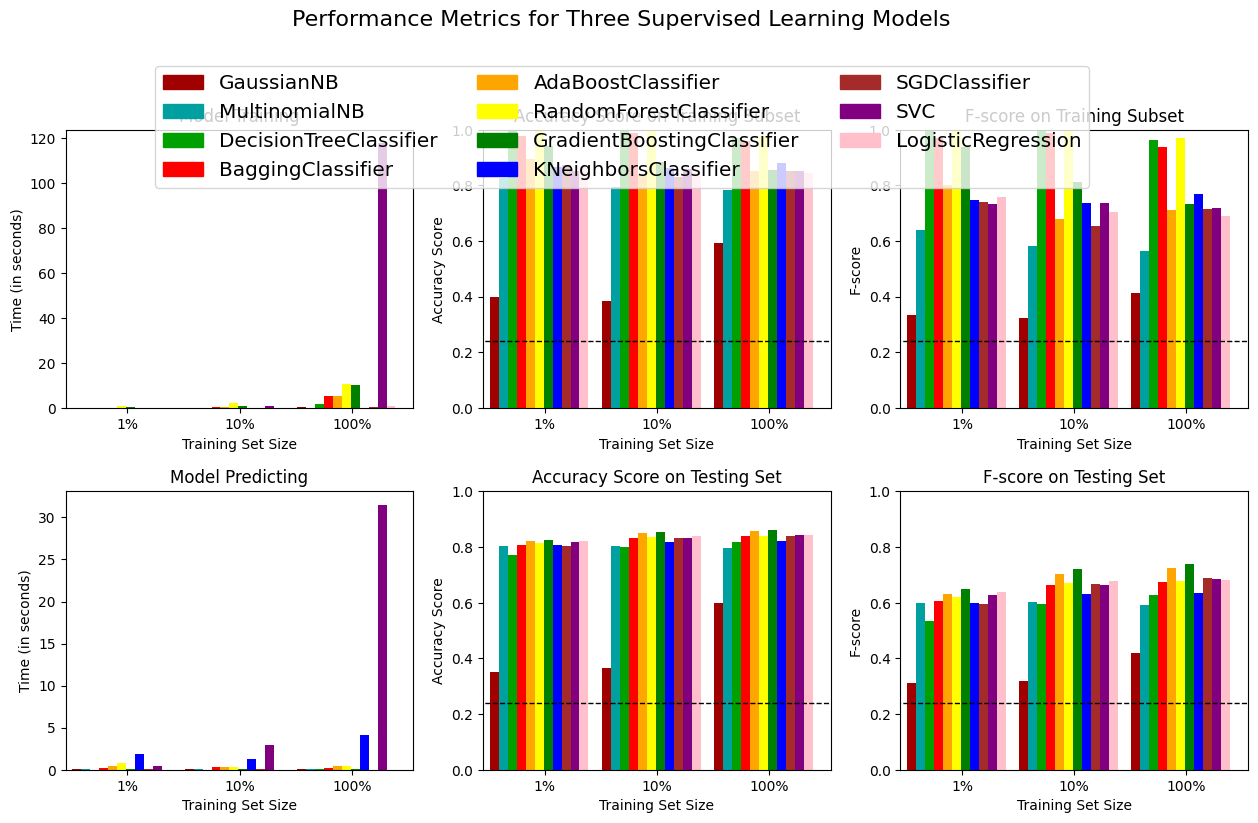

In [104]:

evaluate2(results, 0.24, 0.24)  # .24 and .24 are the accuracy and f-score of naive predictor above

In [96]:
# a helper to plot the performance across different types of classifier
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
def evaluate2(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (11,8))

    # Constants
    bar_width = 0.08
    colors = ['#A00000','#00A0A0','#00A000', 'red', 'orange', 'yellow', 'green', 'blue', 'brown', 'purple', 'pink']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                try:
                    ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                except:
                    pass
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, x = 0.63, y = 1.05)
    # Tune the subplot layout
    # Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html for more details on the arguments
    pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
    pl.tight_layout()
    pl.show()

# Model Tuning on the winner: Gradient Boosting Classifier

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
start = time()
clf = GradientBoostingClassifier(random_state=0)
parameters = {
	"n_estimators": [100, 200],
	"max_depth": [3, 12],
	"min_samples_leaf": [3, 15],
	"min_samples_split": [3, 15, 35],
	"subsample": [0.5, 1.0],
	"learning_rate": [0.1]
}

scorer = make_scorer(fbeta_score, beta=0.5)
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, verbose=3)
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_
end = time()
print(f"grid search took {start-end} seconds")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, subsample=0.5;, score=0.736 total time=   8.2s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, subsample=0.5;, score=0.757 total time=   4.7s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, subsample=0.5;, score=0.742 total time=   8.2s
[CV 4/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, subsample=0.5;, score=0.738 total time=   5.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, subsample=0.5;, score=0.747 total time=   6.2s
[CV 1/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, subsample=1.0;, score=0.736 total time=   7.2s
[CV 2/5] END learning_rate=0.1, 

In [ ]:
normal_predictions = (clf.fit(X_train, y_train)).predict(X_test)
tuned_clf_predictions = best_clf.predict(X_test)

# report
print(f"Unoptimized model \n --------------")
print(f"Accuracy score on testing data: {accuracy_score(y_test, normal_predictions):.4f}")
print(f"F-0.5 score on testing data: {fbeta_score(y_test, normal_predictions, beta=0.5):.4f}")
print()
print(f"Optimized model \n --------------")
print(f"Accuracy score on testing data: {accuracy_score(y_test, tuned_clf_predictions):.4f}")
print(f"F-0.5 score on testing data: {fbeta_score(y_test, tuned_clf_predictions, beta=0.5):.4f}")

# Assessing feature importance

In [ ]:
gbcModel = GradientBoostingClassifier(random_state=0)
gbcModel.fit(X_train, y_train)
importances = gbcModel.feature_importances_
vs.feature_plot(importances, X_train, y_train)


In [ ]:
# train the model on the same training set with only the most important features
from sklearn.base import clone
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# train on the "best" model found from the grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# report
print(f"Tuned model - trained on full data \n --------------")
print(f"Accuracy score on testing data: {accuracy_score(y_test, tuned_clf_predictions):.4f}")
print(f"F-0.5 score on testing data: {fbeta_score(y_test, tuned_clf_predictions, beta=0.5):.4f}")
print()
print(f"Tuned model - trained on reduced data \n --------------")
print(f"Accuracy score on testing data: {accuracy_score(y_test, reduced_predictions):.4f}")
print(f"F-0.5 score on testing data: {fbeta_score(y_test, reduced_predictions, beta=0.5):.4f}")